# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [99]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use("seaborn-white")

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [6]:
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because it has a much larger range/mean.

#### Question 4. Drop data points with missing data


In [96]:
df = df_raw.dropna()
# Alternatively, df_raw.dropna(inplace=True)
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 


Answer: Depending on the method, you may need to do more or less checking. In this case, using dropna() is good so just count() is a useful check.

#### Question 6. Create box plots for GRE and GPA

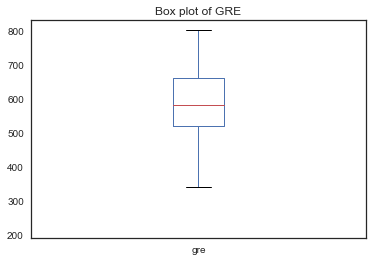

In [97]:
#boxplot 1
df['gre'].plot(kind='box');
# Alternative method
#df.boxplot(column='gre', return_type='axes')
plt.title("Box plot of GRE");

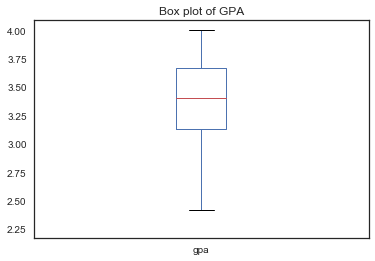

In [98]:
#boxplot 2 
df['gpa'].plot(kind='box');
# Alternative method
#df.boxplot(column='gpa', return_type='axes')
plt.title("Box plot of GPA");

#### Question 7. What do this plots show?

Answer: min, max, median, 25%, 75%, outliers

#### Question 8. Describe each distribution 

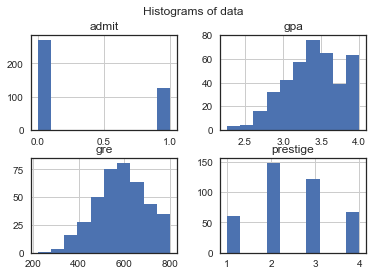

In [32]:
# plot the distribution of each variable 
df.hist();
plt.suptitle("Histograms of data");

In [11]:
df.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

- both GPA and GRE are slightly skewed
- GPA has a range of 2.26 to 4, mean of 3.39 and median of 3.395
- GRE has a range of 220 to 800, mean of 588 and median of 580

In [90]:
def dense_plot(data, col):
    data[col].plot(kind="density");
    plt.axvline(x=data[col].mode()[0], c="k", ls="-.");    # Plot black line at mode
    plt.axvline(x=data[col].mean(), c="r", ls=":");    # Plot red line at mean
    plt.axvline(x=data[col].median(), c="g", ls="--");    # Plot green line at median
    plt.title("Density plot of {}".format(col));

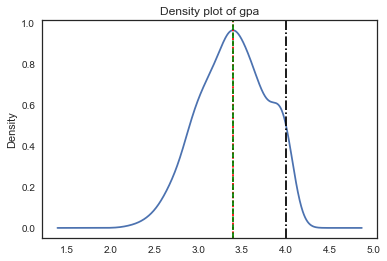

In [88]:
dense_plot(df, "gpa");

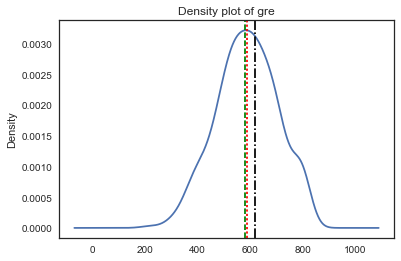

In [89]:
dense_plot(df, "gre");

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, GPA and GRE are just slightly skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Ansswer: Though slightly skewed, in this setting there is no need to correct anything.

#### Question 11. Which of our variables are potentially colinear? 

In [11]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


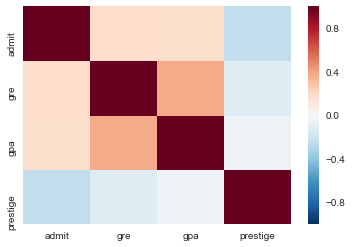

In [12]:
sns.heatmap(df.corr());

#### Question 12. What did you find?

Answer: Colinearity is not a concern here. (There is some correlation between GRE and GPA but it is not high.)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

- Load the data
- Identify missing values and drop them (or impute them)
- Run a pairplot of the columns to see if there's any relationship between admission and prestige
    - Visually it's difficult to tell because there are only 2 outcomes for admit and in a pairplot, the points overlap(see below)
- Run a violin plot of prestige and admit and you'll see that prestige 2, 3, and 4 have fatter bottoms, and the heads get slimmer and the numbers increase (i.e. as prestige drops)

For a more rigorous analysis:

1. Do a crude analysis with the following model
        P(admit = 1) = alpha + beta(prestige)

2. Repeat controlling for gre and gpa

The above assumes you're running the analysis by hand. Note that when you run a regression model via statsmodels or sklearn, the coefficients of the resulting model are in fact _ceteris paribus_. E.g. If you ran a linear regression model of GRE (Y) against GPA and Prestige (Xs), the coefficient of GPA, $X_1$, means that holding prestige constant, then for every 1 unit increase in GPA, GRE increases by $X_1$ units. In this case however, you probably wouldn't run a linear regression model because you're not prediction a continuous output.

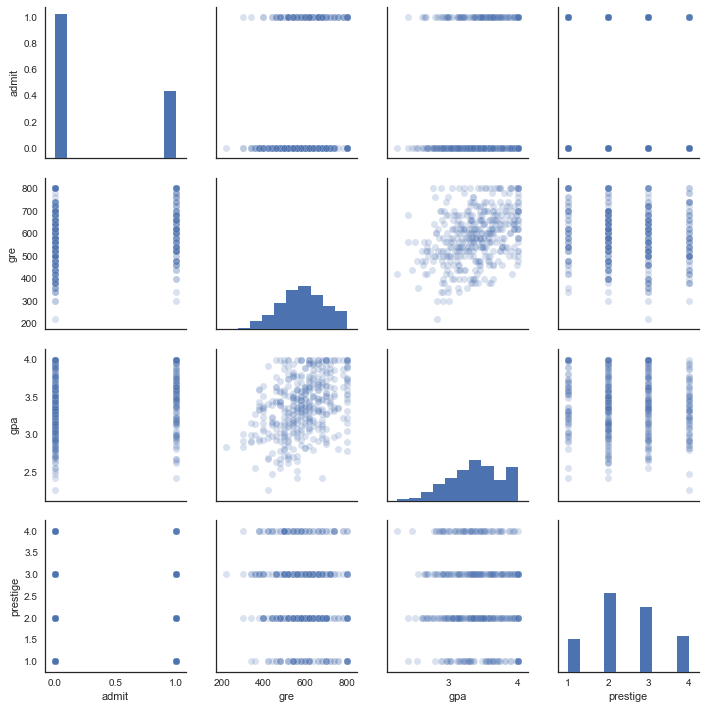

In [20]:
sns.pairplot(df, plot_kws={"alpha":0.2});

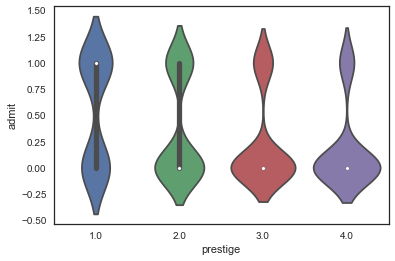

In [24]:
sns.violinplot(x="prestige", y="admit", data=df);

#### Question 14. What is your hypothesis? 

Answer: 

Null hypothesis, $H_0$: There is no relationship between the prestige of a student's undergraduate institution and the likelihood that he or she will be admitted to graduate school.

Alternative hypothesis, $H_1$: Students who attended a more prestigious undergraduate institution (i.e. prestige is represented by a lower number) are more likely to be admitted to graduate school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Apart from dropping missing data, we could also consider imputing the missing data.

#### 2. Bonus: Log transform the skewed data

In [102]:
df_log = df[['gre', 'gpa']].apply(np.log)

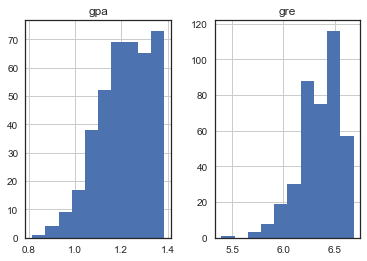

In [103]:
df_log.hist();

Note that there is actually no need to log transform the data in this case. The result of the log transformation results in a distribution that is just as or even more skewed than our original data.

In [104]:
df_log.skew()

gre   -0.760630
gpa   -0.475651
dtype: float64

In [101]:
df.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

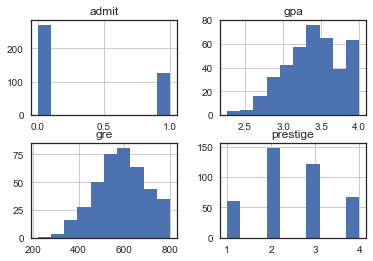

In [13]:
# original distributions for comparison
df.hist();

#### 3. Advanced: Impute missing data

Method of imputation:

We saw that there is some correlation between GRE and GPA, and given what we know of the academic world, we should also be able to deduce the prestige of a student's undergraduate institution given both the GRE and GPA scores.

Method 1: 

- Build a linear regression model with GRE (Y) against GPA and Prestige (Xs).
- Using this model, predict the missing GRE scores.
- Build a classification model with Prestige (Y) against GRE and GPA (Xs).
- Using this model, predict the missing prestige values.

Method 2:

- Try using `sklearn.preprocessing.Imputer`